In [1]:
import pandas as pd

exp_data = pd.read_csv("DATA/DAE.csv")

exp_data

,timestamp,cycle,type,186.85486,187.31995223015844,187.78500323297956,188.250012996982,188.71498151068454,189.17990876260572,189.64479474126426,...,1032.9632529736894,1033.3204920667242,1033.6776665334785,1034.034776362471,1034.3918215422202,1034.7488020612445,1035.1057179080635,1035.4625690711953,1035.8193555391586,1036.176077300472
0,2025-04-04 11:29:32.797890,1,zero,16.990556,24978.543889,249.154361,241.872694,253.523361,243.935833,258.499167,...,652.315972,654.500472,655.471361,647.218806,664.694806,659.354917,666.151139,657.049056,657.049056,657.049056
1,2025-04-04 11:31:06.034842,1,on,16.990556,24978.543889,254.858333,231.395185,276.163951,261.600617,252.431111,...,639.168519,672.070864,642.944198,664.789198,651.034938,650.495556,633.235309,639.707901,639.707901,639.707901
2,2025-04-04 11:31:07.075687,1,on,16.990556,24978.543889,240.025309,238.676852,256.206790,239.755617,265.106605,...,653.192469,652.922778,643.483580,663.710432,668.834568,634.853457,628.111173,670.452716,670.452716,670.452716
3,2025-04-04 11:31:08.109308,1,on,16.990556,24978.543889,242.991914,246.767593,242.182840,280.479012,280.748704,...,637.820062,659.665062,663.440741,645.641111,635.662531,629.189938,638.359444,631.347469,631.347469,631.347469
4,2025-04-04 11:31:09.153691,1,on,16.990556,24978.543889,241.643457,222.765062,271.039815,262.140000,255.667407,...,652.113704,651.844012,651.574321,651.034938,648.877407,647.528951,638.629136,645.101728,645.101728,645.101728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,2025-04-04 11:41:43.804611,1,on,16.990556,24978.543889,241.913148,236.789012,220.337840,231.934568,246.767593,...,649.686481,641.326049,641.865432,641.865432,641.056358,645.371420,639.438210,631.347469,631.347469,631.347469
615,2025-04-04 11:41:44.858569,1,on,16.990556,24978.543889,212.786481,231.125494,234.361790,239.755617,265.106605,...,638.089753,626.762716,630.268704,636.201914,634.853457,648.068333,654.001543,662.361975,662.361975,662.361975
616,2025-04-04 11:41:45.888795,1,on,16.990556,24978.543889,223.304444,240.564691,237.058704,251.622037,240.295000,...,659.125679,635.392840,641.056358,646.719877,642.135123,654.540926,630.268704,648.338025,648.338025,648.338025
617,2025-04-04 11:41:46.925455,1,on,16.990556,24978.543889,232.204259,234.631481,235.170864,257.824938,243.800988,...,621.368889,644.292654,632.156543,629.459630,631.617160,652.653086,630.808086,632.426235,632.426235,632.426235


In [2]:
import numpy as np

intensities=np.array(exp_data[(exp_data["type"] != "zero") & (exp_data["type"] != "static")].iloc[:, 3:], dtype=np.float64)
static=np.array(exp_data[(exp_data["type"]== "static")].iloc[:, 3:], dtype=np.float64)[0]
zero=np.array(exp_data[(exp_data["type"]== "zero")].iloc[:, 3:], dtype=np.float64)[0]
wavelengths = np.array(exp_data.columns[3:], dtype=np.float64)
timestamps = pd.to_datetime(exp_data["timestamp"][(exp_data["type"] != "zero") & (exp_data["type"] != "static")]) # Convert timestamp strings to datetime objects
timestamps = np.array((timestamps - timestamps.iloc[0]).dt.total_seconds()) # Convert to seconds since the first timestamp

def compute_absorbance(intensities: np.ndarray, static: np.ndarray, zero: np.ndarray) -> np.ndarray:
    EPS = 1e-12
    num = intensities - static
    den = np.maximum(zero - static, EPS)  # Éviter division par zéro
    absorbance = -np.log10(np.maximum(num / den, EPS))  # Éviter log(0) ou log(négatif)
    return absorbance

absorbance = compute_absorbance(intensities, static, zero)

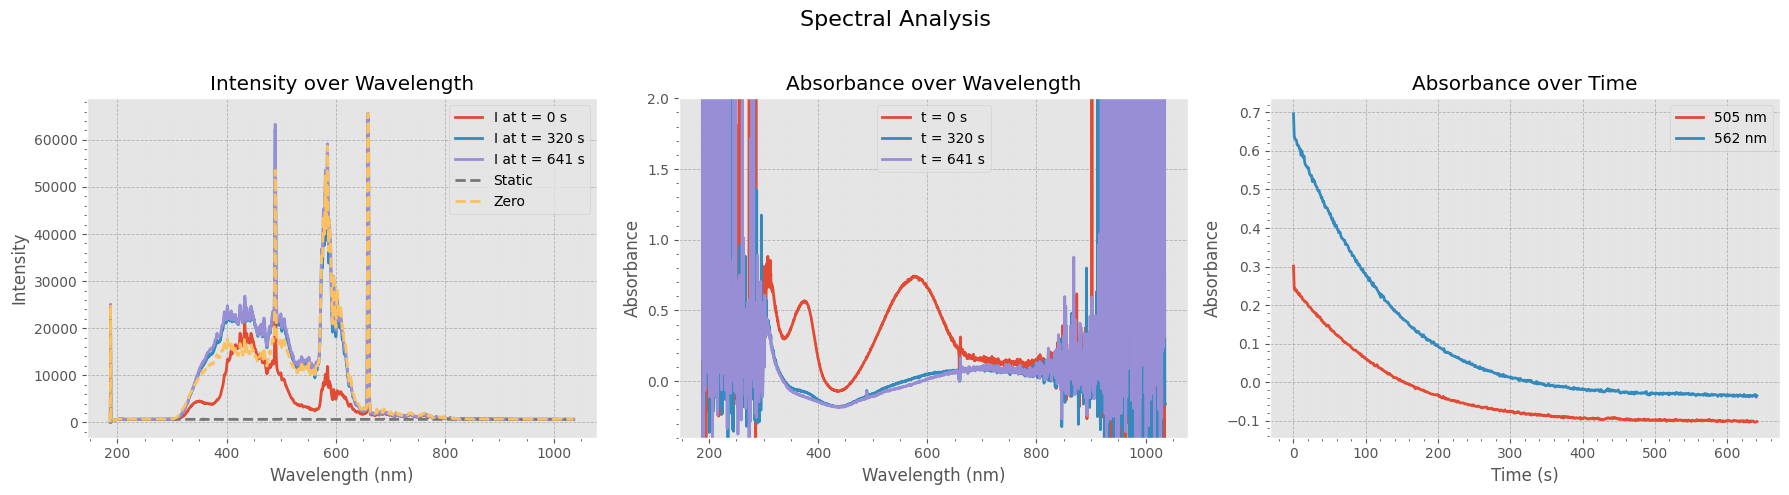

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Set global style
plt.style.use("ggplot")  # Clean style

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Spectral Analysis", fontsize=16)

# --- Intensity Plot ---
axs[0].plot(wavelengths, intensities[0, :], label=f"I at t = {timestamps[0]:.0f} s", linewidth=2)
axs[0].plot(wavelengths, intensities[len(intensities)//2, :], label=f"I at t = {timestamps[len(intensities)//2]:.0f} s", linewidth=2)
axs[0].plot(wavelengths, intensities[-1, :], label=f"I at t = {timestamps[-1]:.0f} s", linewidth=2)
axs[0].plot(wavelengths, static, '--', label="Static", linewidth=2)
axs[0].plot(wavelengths, zero, '--', label="Zero", linewidth=2)
axs[0].set_title("Intensity over Wavelength")
axs[0].set_xlabel("Wavelength (nm)")
axs[0].set_ylabel("Intensity")
axs[0].legend()
axs[0].grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', alpha=0.5, zorder=0)
axs[0].minorticks_on()
axs[0].grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.4, zorder=0)
# --- Absorbance Plot ---
axs[1].plot(wavelengths, absorbance[0, :], label=f"t = {timestamps[0]:.0f} s", linewidth=2)
axs[1].plot(wavelengths, absorbance[len(absorbance)//2, :], label=f"t = {timestamps[len(absorbance)//2]:.0f} s", linewidth=2)
axs[1].plot(wavelengths, absorbance[-1, :], label=f"t = {timestamps[-1]:.0f} s", linewidth=2)
axs[1].set_title("Absorbance over Wavelength")
axs[1].set_xlabel("Wavelength (nm)")
axs[1].set_ylabel("Absorbance")
axs[1].set_ylim(-0.4, 2)
axs[1].legend()
axs[1].grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', alpha=0.5, zorder=0)
axs[1].minorticks_on()
axs[1].grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.4, zorder=0)
# --- Absorbance vs Time Plot ---
WL = [505, 562]
idxs = [np.argmin(np.abs(wavelengths - wl)) for wl in WL]

for i, idx in enumerate(idxs):
    axs[2].plot(timestamps, absorbance[:, idx], label=f"{wavelengths[idx]:.0f} nm", linewidth=2)

axs[2].set_title("Absorbance over Time")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Absorbance")
axs[2].legend()
axs[2].grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', alpha=0.5, zorder=0)
axs[2].minorticks_on()
axs[2].grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.4, zorder=0)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

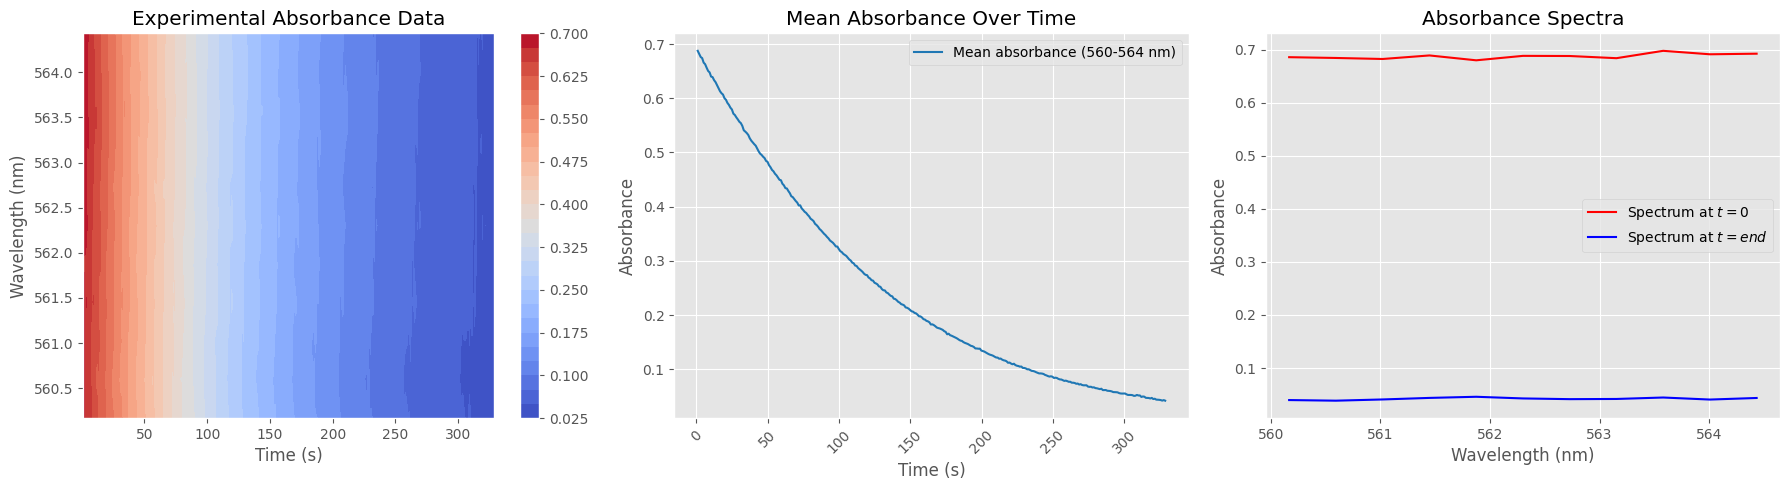

In [26]:
# Define wavelength range of interest
wavelength_range = [560, 565]
idx_range = np.argmin(np.abs(wavelengths[:, None] - wavelength_range), axis=0)

# Extract and normalize absorbance data within the wavelength range
absorbance_subset = absorbance[:, idx_range[0]:idx_range[1]]
absorbance_subset -= np.min(absorbance_subset)
wavelengths_subset = wavelengths[idx_range[0]:idx_range[1]]

# Filter out specific time points (e.g., first frame and last 300 entries)
# Adjust indices as needed
time_filter_indices = [0] + list(range(-300, 0))
absorbance_subset = np.delete(absorbance_subset, time_filter_indices, axis=0)
timestamps_filtered = np.delete(timestamps, time_filter_indices)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# --- 1. Absorbance Heatmap ---
X, Y = np.meshgrid(timestamps_filtered, wavelengths_subset)
contour = axs[0].contourf(X, Y, absorbance_subset.T, levels=30, cmap="coolwarm")
axs[0].set_title("Experimental Absorbance Data")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Wavelength (nm)")
fig.colorbar(contour, ax=axs[0])

# --- 2. Absorbance Over Time (Averaged Across Wavelength Range) ---
mean_absorbance = np.mean(absorbance_subset, axis=1)
axs[1].plot(timestamps_filtered, mean_absorbance, label=f"Mean absorbance ({wavelengths_subset[0]:.0f}-{wavelengths_subset[-1]:.0f} nm)", color='tab:blue')
axs[1].set_title("Mean Absorbance Over Time")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Absorbance")
axs[1].tick_params(axis="x", rotation=45)
axs[1].legend()
axs[1].grid(True)

# --- 3. Absorbance Spectrum at Start and End ---
axs[2].plot(wavelengths_subset, absorbance_subset[0, :], label="Spectrum at $t=0$", color='red')
axs[2].plot(wavelengths_subset, absorbance_subset[-1, :], label="Spectrum at $t=end$", color='blue')
axs[2].set_title("Absorbance Spectra")
axs[2].set_xlabel("Wavelength (nm)")
axs[2].set_ylabel("Absorbance")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Fit to get LED power

In [24]:
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit

# Physics constants :

h = 6.62607004 * 10 ** (-34)
NA = 6.02214086 * 10 ** (23)
c_vaccum = 299792458
wl = 505 # nm
v = c_vaccum / (wl * 1e-9)
volume = 14e-4 # L
l = 1 # cm
eps_closed_505 = 0.6e4 # M-1 . cm-1
eps_closed_562 = 1.1e4 # M-1 . cm-1
I_w = 14.27e-3

QY_CF2OF = np.power(10,-2.67+526/505)
print(QY_CF2OF)
#QY_CF2OF = 0.0233

0.023527953784075146


Reg start
=== Fit Results ===
Parameter 1: 0.0109 ± 0.0000
Parameter 2: 1.0000 ± 0.0000


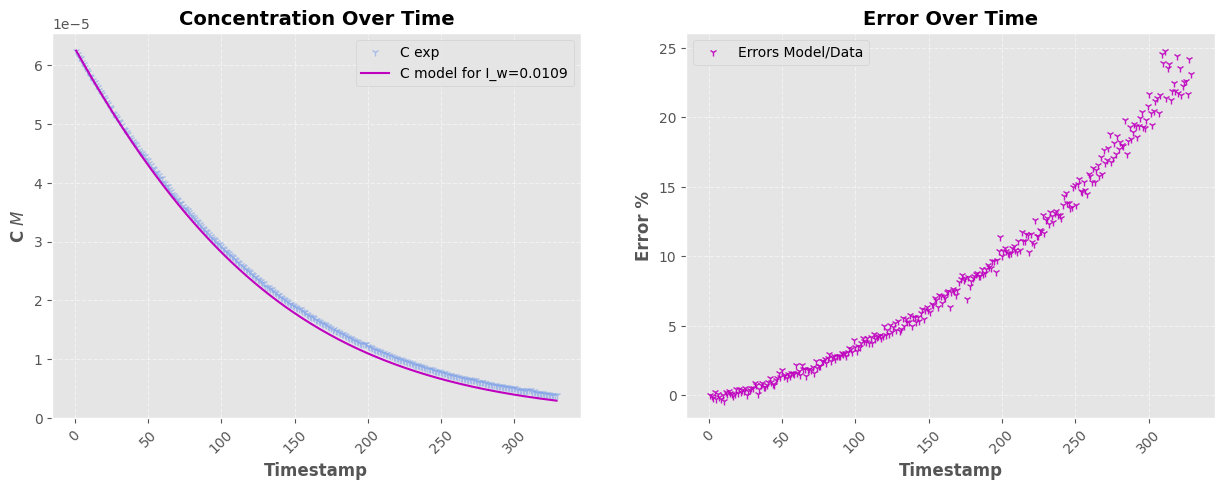

In [25]:

C_exp = mean_absorbance/(eps_closed_562*l)

C0 = C_exp[0]


def f(t, C_closed, I_w):
    # Con[Con<0]=0
    I_0 = I_w  / (h * v * NA) / volume # mole de photons.L-1
    Iabs_CF =  I_0 * (1 - np.exp(- eps_closed_505 * C_closed * l * np.log(10)))
    dCCF_deri = -QY_CF2OF * Iabs_CF 
    # print(f"Con = {Con}, dC = {dCon_deri}, t = {t}")
    return dCCF_deri

def fi(t, q1, c):
    sol = solve_ivp(f, t_span, y0, args=(q1,), t_eval=timestamps_filtered)
    if not sol.success:
        print("⚠️ solve_ivp failed:", sol.message)
        return None  # Retourne None en cas d'échec
    return sol.y.flatten()#+c



initial_guess = (I_w, 1)
bounds = ([0, -1],  [100e-3, 1])

t_span = [timestamps_filtered[0], timestamps_filtered[-1]]
y0 = np.array([C0])
# y = solve_ivp(f, t_span, y0, args=(QY,), t_eval=timestamps)

print("Reg start")
popt, pcov = curve_fit(fi, timestamps_filtered, C_exp, p0=initial_guess, bounds=bounds)
uncertainties = np.sqrt(np.diag(pcov))

# Print results
print("=== Fit Results ===")
for i, (coef, incert) in enumerate(zip(popt, uncertainties), start=1):
    print(f"Parameter {i}: {coef:.4f} ± {incert:.4f}")

# Compute fitted values
fitted_values = fi(timestamps_filtered, *popt)
    

fig, a = plt.subplots(1, 2, figsize=(15, 5))
pastel_colors = ["m", "#f9955e", "#81a3e8"]  # Mauve, orange, sky blue

# First Plot - Concentration Over Time
a[0].plot(timestamps_filtered, C_exp, "1", color=pastel_colors[2], label="C exp", alpha=0.6)
a[0].plot(timestamps_filtered, fitted_values, "-", color=pastel_colors[0], label=f"C model for I_w={popt[0]:0.4f}")


a[0].set_xlabel("Timestamp", fontsize=12, fontweight="bold")
a[0].set_ylabel("C $M$", fontsize=12, fontweight="bold")
a[0].set_title("Concentration Over Time", fontsize=14, fontweight="bold")
a[0].tick_params(axis="x", rotation=45)
a[0].grid(linestyle="--", alpha=0.5)
a[0].legend()

# Second Plot - Error Over Time
a[1].plot(timestamps_filtered, (C_exp - fitted_values) * 100 / C_exp, "1", color=pastel_colors[0], label="Errors Model/Data", alpha=0.9)


a[1].set_xlabel("Timestamp", fontsize=12, fontweight="bold")
a[1].set_ylabel("Error %", fontsize=12, fontweight="bold")
a[1].set_title("Error Over Time", fontsize=14, fontweight="bold")
a[1].tick_params(axis="x", rotation=45)
a[1].grid(linestyle="--", alpha=0.5)
a[1].legend()

plt.show()